# Gangs and IDPs in Port-au-Prince, Haiti

Nearly one-third of Port-au-Prince, Haiti's capital, is plagued by criminal activity and violence caused by an estimated 95 armed gangs, according to the United Nations Office for the Coordination of Humanitarian Affairs. Since June 1, 2021, the city has witnessed a sharp increase in deadly clashes between these rival gangs, fueled by shifts in gang alliances and ongoing territorial disputes. This escalation of violence has led to widespread insecurity and has forced over 120,000 people to flee their homes into makeshift shelters and safer communities, leading to devastating consequences for much of the city.

The data analyzed below comes from the International Organization for Migration's Displacement Tracking Matrix, an assesment of the mass displacement caused by armed gangs in the Haitian capital of Port-au-Prince. That data, collected in February and March 2023, can be found here (https://data.humdata.org/dataset/haiti-displacement-idps-baseline-assessment-iom-dtm/resource/00acbb24-2a1c-4b14-9a2d-7217f6c37d81).

I then overlaid that data with a map of gangland territories compiled by an open source researcher, which is just used as an approximate understanding of gang control at one point in early 2023, found here (https://www.google.com/maps/d/u/0/viewer?mid=1rQHDoleAxTW0ya2cN5Jm8oBfyLOhqyk&shorturl=1&ll=18.56070167568382%2C-72.31479892417353&z=12).

For more info about this project, view the Github page.
_____URL_____

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
pd.read_csv("HT_final_trim.csv")
df = pd.read_csv("HT_final_trim.csv")

In [3]:
df.head()

,Evaluation date,Type of place evaluated,Commune name,Municipal section name,Neighborhood name,Name of the site,Spontaneous site type,Internally displaced households,IDPs counted,Site size in meters,...,What are the 3 main\nsecurity concerns in the\nsite?,Do boys attend school?,Do girls attend school?,Health problems,proportion vaccine cholera,Why not cholera vaccine,How much Death Cholera,Food source,Access to fertile land,Proportion of persons carrying out a subsistence activity
0,2023-02-20,Site,Port-au-Prince,1re Section Turgeau,Delmas 2 - Saint-Martin - Tokyo,Institut Monfort,School,2096,10480,Over 150 square meters,...,Another gang gang fuss,some,some,infection_plaie diarrhee malnutrition,A few people (about 25%),Pas_vaccin fear,10.0,Purchase_ assault_hum,No access to cultivable land,some
1,2023-02-15,Site,Delmas,1re Section St Martin,2ème Cite Saint Martin,Camps zamor,Site installed on an air space,2107,6795,Over 150 square meters,...,"Attack GA, G Fight gang gang police",some,some,Illness_peau cholera diarrhee,The majority of people (around 75%),other afraid,6.0,Purchase_Marche Production_Subsistance,"In any case, there is no cultivable land avail...",some
2,2023-03-07,Host community,Port-au-Prince,1re Section Turgeau,Village du Bicentenaire,Not applicable to host communities,Not applicable to host communities,980,4900,Not applicable to host communities,...,"Attack GA, G Fight gang gang police",half,half,diarrhea coughing,About half of the people,fear,NaN,Borrow purchase_marche,"In any case, there is no cultivable land avail...",some
3,2023-02-15,Host community,Port-au-Prince,1re Section Turgeau,La Grotte,Not applicable to host communities,Not applicable to host communities,800,4800,Not applicable to host communities,...,other,half,majority,diarrhee disease_peau fever,Nobody,no_vaccin,NaN,Purchase_ assault_hum,"In any case, there is no cultivable land avail...",some
4,2023-03-09,Host community,Port-au-Prince,2e Section Morne l'Hopital,Beauboeuf,Not applicable to host communities,Not applicable to host communities,960,4800,Not applicable to host communities,...,"Ga attack, g gang font recruitment child gang",some,some,infection_plaie diarrhee malnutrition,About half of the people,fear,10.0,Borrow purchase_marche,No access to cultivable land,some


In [4]:
df.shape

(287, 50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 50 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Evaluation date                                                         287 non-null    object 
 1   Type of place evaluated                                                 287 non-null    object 
 2   Commune name                                                            287 non-null    object 
 3   Municipal section name                                                  287 non-null    object 
 4   Neighborhood name                                                       287 non-null    object 
 5   Name of the site                                                        287 non-null    object 
 6   Spontaneous site type                                                   287 non-nu

### How many people are displaced?

In [6]:
df['IDPs counted'] = pd.to_numeric(df['IDPs counted'], errors='coerce')
total_idps = df['IDPs counted'].sum(skipna=True)
total_idps

127977

127,977 internally displaced people were counted by the International Organization for Migration in Port-au-Prince in February and March 2023.

### Where are they taking refuge?

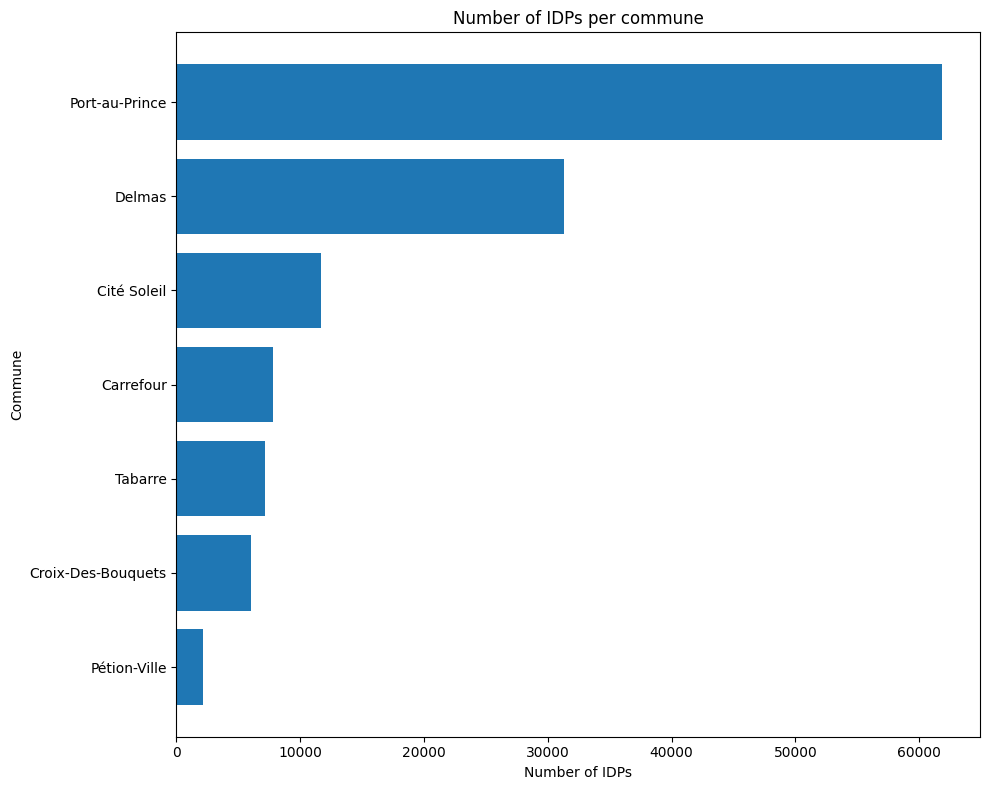

In [38]:
commune_idp_counts = df.groupby('Commune name')['IDPs counted'].sum().reset_index()
commune_idp_counts = commune_idp_counts.sort_values('IDPs counted', ascending=True)

commune_idp_counts.to_csv("commune_idp_counts.csv")

plt.figure(figsize=(10, 8))
plt.barh(commune_idp_counts['Commune name'], commune_idp_counts['IDPs counted'])
plt.xlabel('Number of IDPs')
plt.ylabel('Commune')
plt.title('Number of IDPs per commune')
plt.tight_layout()
plt.show()

In [8]:
commune_idp_counts['Percentage'] = (commune_idp_counts['IDPs counted'] / total_idps) * 100

for index, row in commune_idp_counts.iterrows():
    print(f"{row['Commune name']}: {row['Percentage']:.2f}%")

Pétion-Ville: 1.68%
Croix-Des-Bouquets: 4.73%
Tabarre: 5.58%
Carrefour: 6.11%
Cité Soleil: 9.13%
Delmas: 24.46%
Port-au-Prince: 48.30%


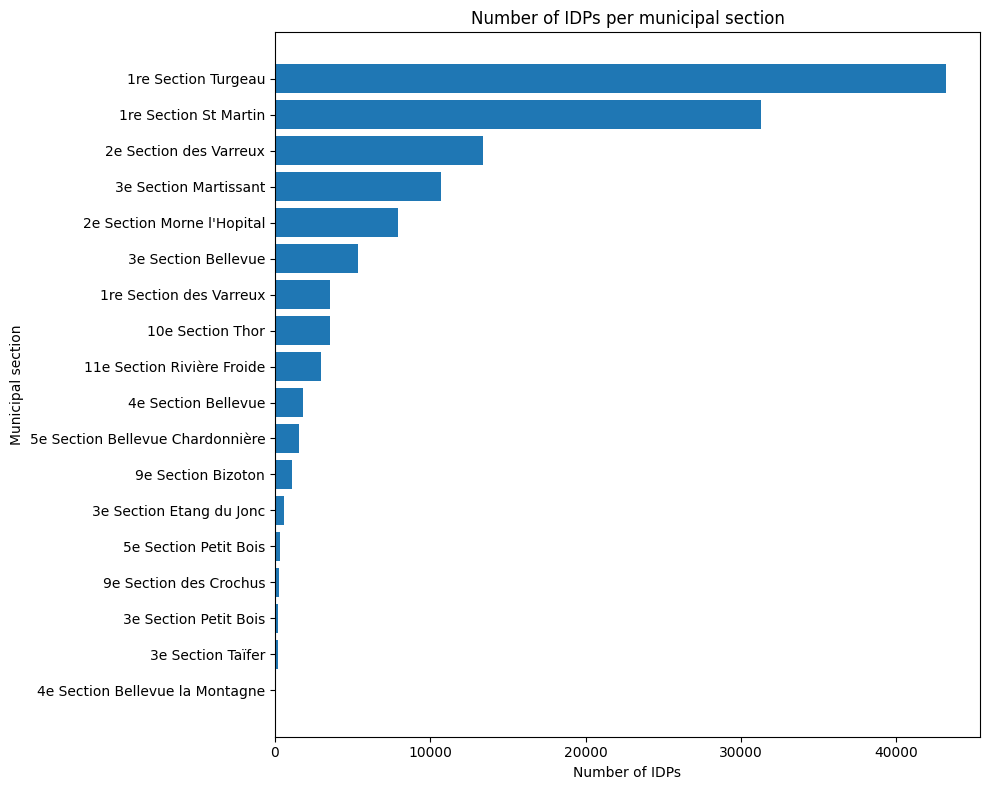

In [9]:
municipal_idp_counts = df.groupby('Municipal section name')['IDPs counted'].sum().reset_index()
municipal_idp_counts = municipal_idp_counts.sort_values('IDPs counted', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(municipal_idp_counts['Municipal section name'], municipal_idp_counts['IDPs counted'])
plt.xlabel('Number of IDPs')
plt.ylabel('Municipal section')
plt.title('Number of IDPs per municipal section')
plt.tight_layout()
plt.show()

In [10]:
for index, row in municipal_idp_counts.iterrows():
    print(f"{row['Municipal section name']}: {row['IDPs counted']}")

4e Section Bellevue la Montagne: 10
3e Section Taïfer: 200
3e Section Petit Bois: 220
9e Section des Crochus: 250
5e Section Petit Bois: 350
3e Section Etang du Jonc: 602
9e Section Bizoton: 1105
5e Section Bellevue Chardonnière: 1541
4e Section Bellevue: 1788
11e Section Rivière Froide: 2983
10e Section Thor: 3532
1re Section des Varreux: 3534
3e Section Bellevue: 5359
2e Section Morne l'Hopital: 7915
3e Section Martissant: 10670
2e Section des Varreux: 13387
1re Section St Martin: 31299
1re Section Turgeau: 43232


In [11]:
# Calculate the percentage of sites labeled as "site" and "host community"
total_sites = df[df['Type of place evaluated'] == 'Site'].shape[0]
total_host_communities = df[df['Type of place evaluated'] == 'Host community'].shape[0]
total_entries = df.shape[0]

percentage_sites = (total_sites / total_entries) * 100
percentage_host_communities = (total_host_communities / total_entries) * 100

print("\nPercentage of IDP sites labeled as 'site': {:.2f}%".format(percentage_sites))
print("Percentage of IDP sites labeled as 'host community': {:.2f}%".format(percentage_host_communities))


Percentage of IDP sites labeled as 'site': 17.77%
Percentage of IDP sites labeled as 'host community': 82.23%


In [39]:
site_type_counts = df['Spontaneous site type'].value_counts()
print("\nNumber of occurrences for each site type:")
print(site_type_counts)

site_type_counts.to_csv('site_type_counts.csv', index=False)


Number of occurrences for each site type:
Spontaneous site type
Not applicable to host communities    236
Site installed on an air space         18
Temple/Church                          16
School                                 12
Community Center                        3
Health center                           2
Name: count, dtype: int64


In [13]:
unique_values = df['Land ownership'].unique()
print("Unique values in 'Land ownership' column:")
for value in unique_values:
    print(value)

# Find and print the number of occurrences for land ownership
land_ownership = df['Land ownership'].value_counts()
print("\nLand ownership at IDP sites:")
print(land_ownership)

Unique values in 'Land ownership' column:
To private persons
Not applicable to host communities
Public space / government
Do not know
To people with a kinship with IDPs
nan

Land ownership at IDP sites:
Land ownership
Not applicable to host communities    236
To private persons                     33
Public space / government              13
Do not know                             3
To people with a kinship with IDPs      1
Name: count, dtype: int64


In March 2023, more than 4 of 5 IDPs in Port-au-Prince were taking refuge in host communities where families welcomed them into their homes, while the rest were in makeshift IDP camps at open air sites (18), churches (16), schools (12), community centers (3) and health centers (2).

### Where were they displaced from?

In [14]:
# Print the number of times a municipality is listed as the origin of displacement for a majority of the IDPs at one site
municipality_counts = df['Municipality of origin for majority of IDPs'].value_counts()
print(municipality_counts)

# Print the percentage showing how each municipality ranked in terms of origin of displacement
municipality_percentages = (municipality_counts / len(df)) * 100
print("  ")
print(municipality_percentages)

Municipality of origin for majority of IDPs
Croix-Des-Bouquets    89
Port-au-Prince        74
Pétion-Ville          38
Cité Soleil           35
Carrefour             26
Delmas                13
Tabarre                8
Mirebalais             1
Bombardopolis          1
Gressier               1
Name: count, dtype: int64
  
Municipality of origin for majority of IDPs
Croix-Des-Bouquets    31.010453
Port-au-Prince        25.783972
Pétion-Ville          13.240418
Cité Soleil           12.195122
Carrefour              9.059233
Delmas                 4.529617
Tabarre                2.787456
Mirebalais             0.348432
Bombardopolis          0.348432
Gressier               0.348432
Name: count, dtype: float64


In [15]:
# Create a DF with municipality counts and percentages
municipality_df = pd.DataFrame({'Municipality': municipality_counts.index, 'Count': municipality_counts.values, 'Percentage': municipality_percentages.values})

# Save municipality counts and percentages as CSV
municipality_df.to_csv('municipality_origins.csv', index=False)

In [16]:
# Print the number of times a municipal section is listed as the origin of displacement for a majority of the IDPs at one site
municipal_section_counts = df['Municipal section of origin for IDPs'].value_counts()
print(municipal_section_counts)

# Print the percentage of each municipal section
municipal_section_percentages = (municipal_section_counts / len(df)) * 100
print("  ")
print(municipal_section_percentages)

Municipal section of origin for IDPs
2ème Varreux (Canaan - Jerusalem)    70
8ème Martissant                      36
1ère Varreux                         35
4ème Bellevue la Montagne            33
6ème Turgeau                         24
7ème Morne l'Hopital                 14
10ème Thor                           13
5ème Saint Martin                    13
3ème Petit Bois                       9
11ème Rivière Froide                  8
3ème Bellevue                         8
9ème Bizoton                          4
2ème Varreux (Marin)                  4
3ème Etang du Jong                    4
2ème Petit Bois                       2
2ème Crochus                          2
1ère Petit Bois                       2
6ème Aux Cadets                       1
16ème Taïfer                          1
5ème Gascogne                         1
2ème des Forges                       1
1ère Morne à Bateau                   1
Name: count, dtype: int64
  
Municipal section of origin for IDPs
2ème Varreux (Can

In [17]:
# Create a DataFrame with municipal section counts and percentages
municipal_section_df = pd.DataFrame({'Municipal Section': municipal_section_counts.index, 'Count': municipal_section_counts.values, 'Percentage': municipal_section_percentages.values})

# Save municipal section counts and percentages as CSV
municipal_section_df.to_csv('municipal_section_origins.csv', index=False)

In [18]:
# Print the number of times a district is listed as the origin of displacement for a majority of the IDPs at one site
district_counts = df['District of origin for IDPs'].value_counts()
print(district_counts)

# Print the percentage of each district
district_percentages = (district_counts / len(df)) * 100
print("  ")
print(district_percentages)

District of origin for IDPs
Canaan - Jerusalem                 64
Bas Martissant                     17
Savanne Pistaches                  13
Pernier 24                          7
Fort National                       7
                                   ..
Village des Rapatries - Menetas     1
CANAAN                              1
Larame                              1
Bizoton - Bergamot                  1
Delmas 33                           1
Name: count, Length: 123, dtype: int64
  
District of origin for IDPs
Canaan - Jerusalem                 22.299652
Bas Martissant                      5.923345
Savanne Pistaches                   4.529617
Pernier 24                          2.439024
Fort National                       2.439024
                                     ...    
Village des Rapatries - Menetas     0.348432
CANAAN                              0.348432
Larame                              0.348432
Bizoton - Bergamot                  0.348432
Delmas 33                         

In [19]:
# Create a DataFrame with district counts and percentages
district_df = pd.DataFrame({'District': district_counts.index, 'Count': district_counts.values, 'Percentage': district_percentages.values})

# Save district counts and percentages as CSV
district_df.to_csv('district_origins.csv', index=False)

### Origin of IDPs map

In [20]:
pd.read_csv("HT ADM4 origins.csv")
df2 = pd.read_csv("HT ADM4 origins.csv")

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Municipality of origin for majority of IDPs  286 non-null    object
 1   Municipal section of origin for IDPs         286 non-null    object
 2   District of origin for IDPs                  284 non-null    object
 3   IDPs counted                                 287 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.1+ KB


In [34]:
# Calculate the sum of IDPs counted for each unique value in "Municipal section of origin for IDPs"
idp_counts_by_adm4 = df2.groupby('Municipal section of origin for IDPs')['IDPs counted'].sum()
total_idps = df2['IDPs counted'].sum()

print(idp_counts_by_adm4)
print(   )
print("Sum total of all IDPs:", total_idps)

Municipal section of origin for IDPs
10ème Thor                            2552
11ème Rivière Froide                  1208
16ème Taïfer                           370
1ère Morne à Bateau                    270
1ère Petit Bois                       1250
1ère Varreux                         12989
2ème Crochus                           776
2ème Petit Bois                        660
2ème Varreux (Canaan - Jerusalem)    17784
2ème Varreux (Marin)                  1153
2ème des Forges                        296
3ème Bellevue                         1326
3ème Etang du Jong                     285
3ème Petit Bois                       3177
4ème Bellevue la Montagne             3399
5ème Gascogne                         3500
5ème Saint Martin                    11713
6ème Aux Cadets                        415
6ème Turgeau                         36518
7ème Morne l'Hopital                 14335
8ème Martissant                      12906
9ème Bizoton                           955
Name: IDPs counte

In [35]:
idp_counts_by_adm4 = pd.DataFrame({'Municipal Section': idp_counts_by_adm4.index, 'IDP Count': idp_counts_by_adm4.values})

In [36]:
idp_counts_by_adm4.to_csv('idp_counts_by_adm4.csv', index=False)

### How many children are displaced? How many people over 60?

In [25]:
# Sum of columns for boys under 18
boys_under_18 = df['Baby boys under 1 year old'] + df['Boys from 1 to 5 years old'] + df['Boys from 6 to 11 years old'] + df['Boys from 12 to 17 years old']
total_boys_under_18 = boys_under_18.sum()

# Sum of columns for girls under 18
girls_under_18 = df['Baby girls under a year old'] + df['Girls from 1 to 5 years old'] + df['Girls from 6 to 11 years old'] + df['Girls from 12 to 17 years old']
total_girls_under_18 = girls_under_18.sum()

# Sum of the "People aged 60 and over" column
total_60_and_over = pd.to_numeric(df['People aged 60 and over'], errors='coerce').sum()

# Print the totals
print("Total number of boys under 18:", total_boys_under_18)
print("Total number of girls under 18:", total_girls_under_18)
print("Total number of people aged 60 and over:", total_60_and_over)

Total number of boys under 18: 27773
Total number of girls under 18: 36131
Total number of people aged 60 and over: 7725


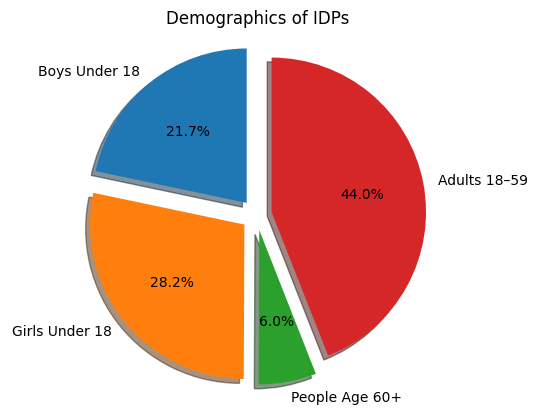

In [26]:
# Convert "IDPs counted" column to numeric values
df['IDPs counted'] = pd.to_numeric(df['IDPs counted'], errors='coerce')

# Calculate the sum of each group
total_boys_under_18 = df['Baby boys under 1 year old'] + df['Boys from 1 to 5 years old'] + df['Boys from 6 to 11 years old'] + df['Boys from 12 to 17 years old']
total_girls_under_18 = df['Baby girls under a year old'] + df['Girls from 1 to 5 years old'] + df['Girls from 6 to 11 years old'] + df['Girls from 12 to 17 years old']
total_60_and_over = pd.to_numeric(df['People aged 60 and over'], errors='coerce')

# Calculate the total number of IDPs
total_idps = df['IDPs counted'].sum()

# Calculate the percentage breakdown
percentage_boys_under_18 = (total_boys_under_18.sum() / total_idps) * 100
percentage_girls_under_18 = (total_girls_under_18.sum() / total_idps) * 100
percentage_60_and_over = (total_60_and_over.sum() / total_idps) * 100
percentage_adults_18_59 = 100 - (percentage_boys_under_18 + percentage_girls_under_18 + percentage_60_and_over)

# Create a DataFrame with the percentage breakdown
data = {'Group': ['Boys Under 18', 'Girls Under 18', 'People Age 60+', 'Adults 18–59'],
        'Percentage': [percentage_boys_under_18, percentage_girls_under_18, percentage_60_and_over, percentage_adults_18_59]}
breakdown_df = pd.DataFrame(data)

# Save the percentage breakdown as a CSV
breakdown_df.to_csv('idp_breakdown.csv', index=False)

# Create a pie chart
labels = breakdown_df['Group']
sizes = breakdown_df['Percentage']
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.title('Demographics of IDPs')
plt.show()

### Can humanitarian workers access these displacement sites?

In [40]:
# Count the occurrences for each type
accessibility_counts = df['Is the place accessible?'].value_counts()

accessibility_counts.to_csv("accessibility_counts", index=False)

# Print the number of occurrences for each type
print(accessibility_counts)

Is the place accessible?
Yes                               231
No, because of physical access     33
No, because of security            22
Name: count, dtype: int64


### Are there tensions between the IDPs and their host communities?

In [28]:
# Count the occurrences for each type
tension_counts = df['Tension between displaced people and the host community?'].value_counts()

print(tension_counts)

Tension between displaced people and the host community?
no     231
Yes     55
Name: count, dtype: int64


Tensions between the IDPs and their hosts exist only in about a quarter of host communities.

### What kind of relief has been received? Food? Health? Cash? Education?

In [29]:
# Select the columns related to aid
aid_columns = ['Distribution of food received?', 'Health assistance', 'Assistance psychosocial',
               'Assistance WASH', 'Distribution CASH', 'Education assistance']

# Count the number of rows with "Yes" and "No" for each aid column
aid_counts = df[aid_columns].apply(pd.Series.value_counts).T

# Calculate the percentage of rows with aid
aid_percentages = (aid_counts['Yes'] / df.shape[0]) * 100

aid_percentages.to_csv('aid_percentages.csv', index=False)

# Print the percentage of IDP sites that have received aid for each column
print("Percentage of IDP sites that have received aid:")
for column in aid_percentages.index:
    print(f"{column}: {aid_percentages[column]:.2f}%")

Percentage of IDP sites that have received aid:
Distribution of food received?: 5.23%
Health assistance: 5.23%
Assistance psychosocial: 0.70%
Assistance WASH: 3.48%
Distribution CASH: 4.53%
Education assistance: 0.70%


### How many IDPs have identification documents?

In [30]:
# Count the number of rows with "Yes" in the specified column
yes_count = df[df['Possession of identity documents by the majority of displaced persons?'] == 'Yes'].shape[0]

# Calculate the percentage of rows with "Yes"
percentage_yes = (yes_count / df.shape[0]) * 100

# Print the number of rows and percentage
print("Number of rows containing 'Yes':", yes_count)
print("Percentage of rows containing 'Yes': {:.2f}%".format(percentage_yes))

Number of rows containing 'Yes': 176
Percentage of rows containing 'Yes': 61.32%


The majority of displaced people had personal identification documents in 61% of sites, meaning about 2 in 5 displaced persons did not have identification documents.

In [31]:
if_not_why_counts = df['If not why ?'].value_counts()

print(if_not_why_counts)

If not why ?
other                                                            39
No office                                                        20
 Lack of financial means                                          8
Neglect                                                           7
Lack of interest                                                  5
Lack of time                                                      3
 Lack of information on the procedures and services available     2
Lack of knowledge on the importance of documentatio               2
Name: count, dtype: int64


In [32]:
# Count the number of rows for each unique value in the "Do boys attend school?" column
boys_attend_school_counts = df['Do boys attend school?'].value_counts()

# Print the number of rows for each unique value in the "Do boys attend school?" column
print("Number of rows for each unique value in 'Do boys attend school?':")
print(boys_attend_school_counts)

# Count the number of rows for each unique value in the "Do girls attend school?" column
girls_attend_school_counts = df['Do girls attend school?'].value_counts()

# Print the number of rows for each unique value in the "Do girls attend school?" column
print("\nNumber of rows for each unique value in 'Do girls attend school?':")
print(girls_attend_school_counts)

Number of rows for each unique value in 'Do boys attend school?':
Do boys attend school?
some        144
half         49
majority     39
none         24
all          24
NSP           6
Name: count, dtype: int64

Number of rows for each unique value in 'Do girls attend school?':
Do girls attend school?
some        142
half         52
majority     36
all          26
none         23
NSP           7
Name: count, dtype: int64


### How many displaced people have died from cholera?

In [33]:
# Calculate the sum of the "How much Death Cholera" column
sum_death_cholera = df['How much Death Cholera'].sum()

print("Sum of 'How much Death Cholera':", sum_death_cholera)

Sum of 'How much Death Cholera': 590.0
